# Amazon Chronos-T5 Model for Stock Price Prediction

This notebook demonstrates the use of Amazon's Chronos-T5-small model for forecasting TSLA stock prices.

**Model**: [amazon/chronos-t5-small](https://huggingface.co/amazon/chronos-t5-small)

**Features**:
- Time series forecasting with confidence intervals
- Performance evaluation using MAE, MSE, and RMSE
- Results comparison with other models

In [1]:
import sys, os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

=== Chronos Forecast Runner ===

🧪 Train: 2025-02-03 → 2025-07-09 (rows=96)
🧾 Test:  2025-07-10 → 2025-07-17 (rows=5)
Chronos forecasting failed: 
Plot saved to /Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/results/TSLA_Chronos_forecast.png


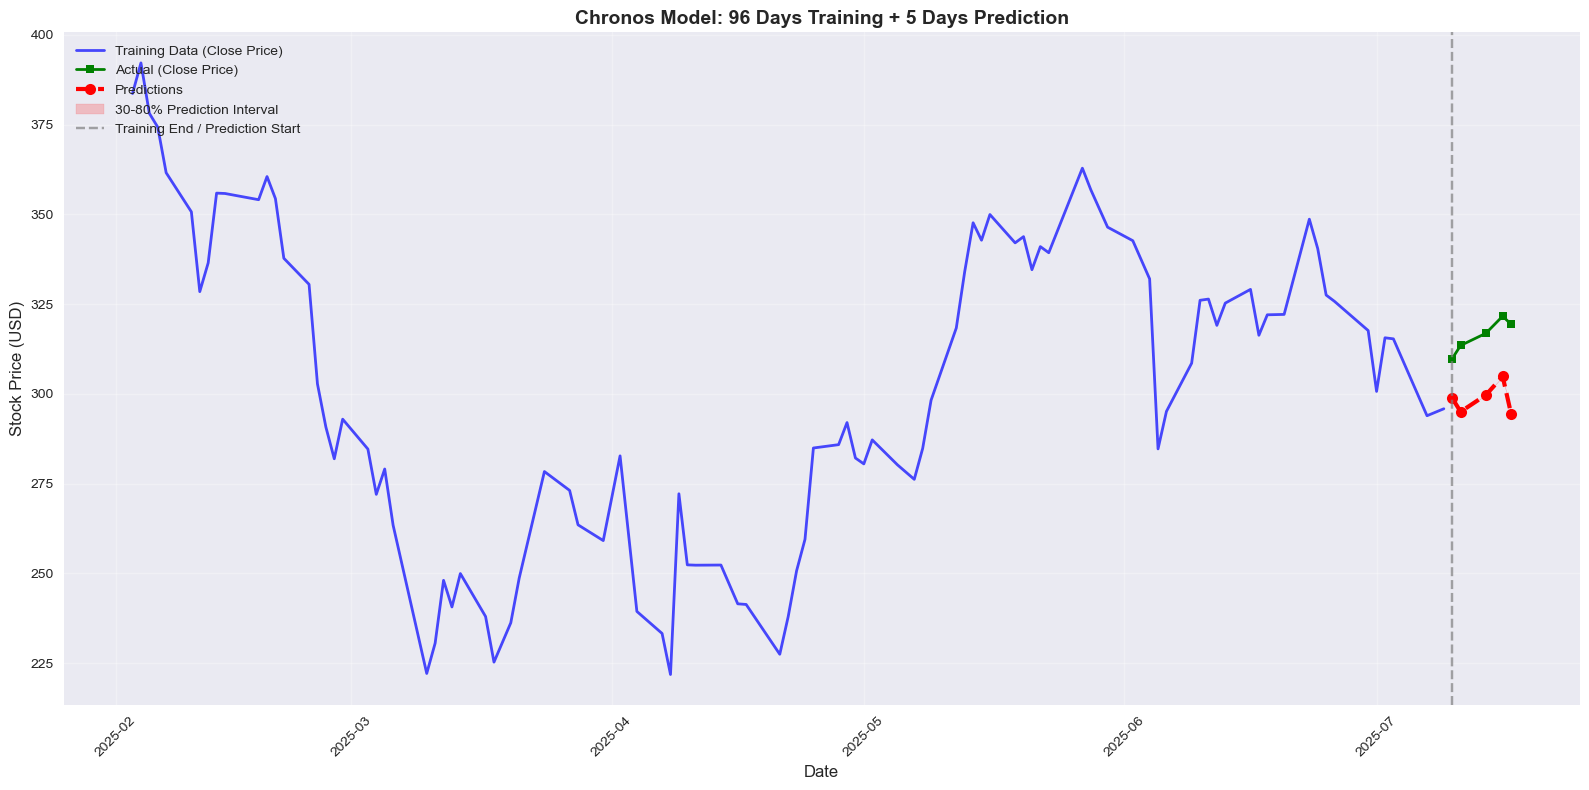

Forecast Performance Metrics:
MAE:  17.68
MSE:  332.02
RMSE: 18.22
MAPE: 5.58%
Results saved to matrix successfully!
               MAE         MSE       RMSE      MAPE
ARIMA    18.951191  371.007986  19.261568  6.036890
TimesFM  23.226695  583.637202  24.158584  7.391855
Chronos  17.675802  332.024072  18.221528  5.578076
Execution time: 9.72 seconds


In [2]:
from models.chronos import main as chronos_main
import time 

start_time = time.time()
chronos_main(train_start='2025-02-01', context_len=96, test_days=5, use_model=True, device='cpu')
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

In [3]:
# Save/append execution time to a unified matrix under results/
import os, pickle, pathlib
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
results_dir = os.path.join(PROJECT_ROOT, 'results')
os.makedirs(results_dir, exist_ok=True)

ticker = 'TSLA'
model_name = 'Chronos'
pkl_path = pathlib.Path(results_dir) / f'{ticker}_execution_time.pkl'
csv_path = pathlib.Path(results_dir) / f'{ticker}_execution_time_matrix.csv'

# Ensure execution_time exists
try:
  execution_time
except NameError:
  execution_time = None

if execution_time is None:
  print('⚠️ execution_time is not defined; skipped saving.')
else:
  # Load existing
  try:
    if pkl_path.exists():
      with open(pkl_path, 'rb') as f:
        exec_df = pickle.load(f)
    else:
      exec_df = pd.DataFrame(columns=['Execution Time'])
  except Exception:
    exec_df = pd.DataFrame(columns=['Execution Time'])

  # Append/update row
  exec_df.loc[model_name] = [execution_time]

  # Save
  with open(pkl_path, 'wb') as f:
    pickle.dump(exec_df, f)
  exec_df.to_csv(csv_path, index=True)

  print('\nTotal Execution Time Matrix:')
  print(exec_df)


Total Execution Time Matrix:
                           Execution Time
ARIMA                            6.862337
TimesFM                         20.481055
Chronos                          9.723370
TFT_baseline                    33.807450
TFT_with_Reddit_Sentiment       66.977261
